In [ ]:
# Q: Is SKM sensitive to multiplicity, or just spread?

In [ ]:
figsize('inline_short')

from collections import OrderedDict
import json
import textwrap
from typing import List

import sklearn
import yaml

from sp14.skm import SKM
from sp14.skm_util import *
from util import *

In [ ]:
np.random.seed(20180517)

(2, 600)

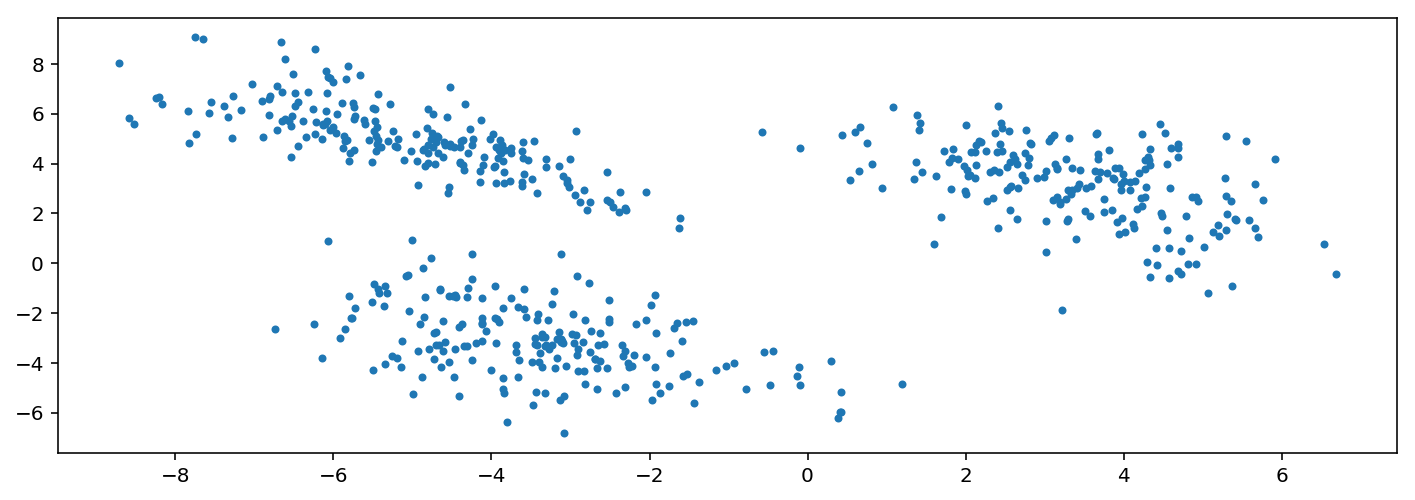

In [ ]:
# Generate training data
#   - skm expects data of the shape (freqs, patches)
npoints = 200
X_train = sklearn.utils.shuffle(
    np.concatenate([
        np.array(polar_to_cart(
            r=5 + np.random.normal(size=npoints, scale=1),
            theta=np.pi/4.0 + np.random.normal(size=npoints, scale=np.pi/8.0),
        )),
        np.array(polar_to_cart(
            r=7 + np.random.normal(size=npoints, scale=2),
            theta=-np.pi/4.0 + np.random.normal(size=npoints, scale=np.pi/32.0),
        )),
        np.array(polar_to_cart(
            r=5 + np.random.normal(size=npoints, scale=1),
            theta=5/4.0  * np.pi + np.random.normal(size=npoints, scale=np.pi/8.0),
        )),
    ], axis=1),
)
display(
    X_train.shape,
)
plt.plot(X_train[0], X_train[1], '.')
plt.show()

In [ ]:
def plot_skm_fit(X_train, D_scale=1, random_state=0, lim=None, **skm_config):
    np.random.seed(random_state)
    skm = SKM(**{
        'verbose': False,
        **skm_config,
    })
    skm.fit(X_train)
    skm.D *= D_scale  # Scale out for better visibility
    skm_visualize_clusters(skm, X_train)
    plt.xlabel('\n'.join(textwrap.wrap(width=60, text=' '.join(f'{k}[{v}]' for k, v in skm_config.items()))))
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)

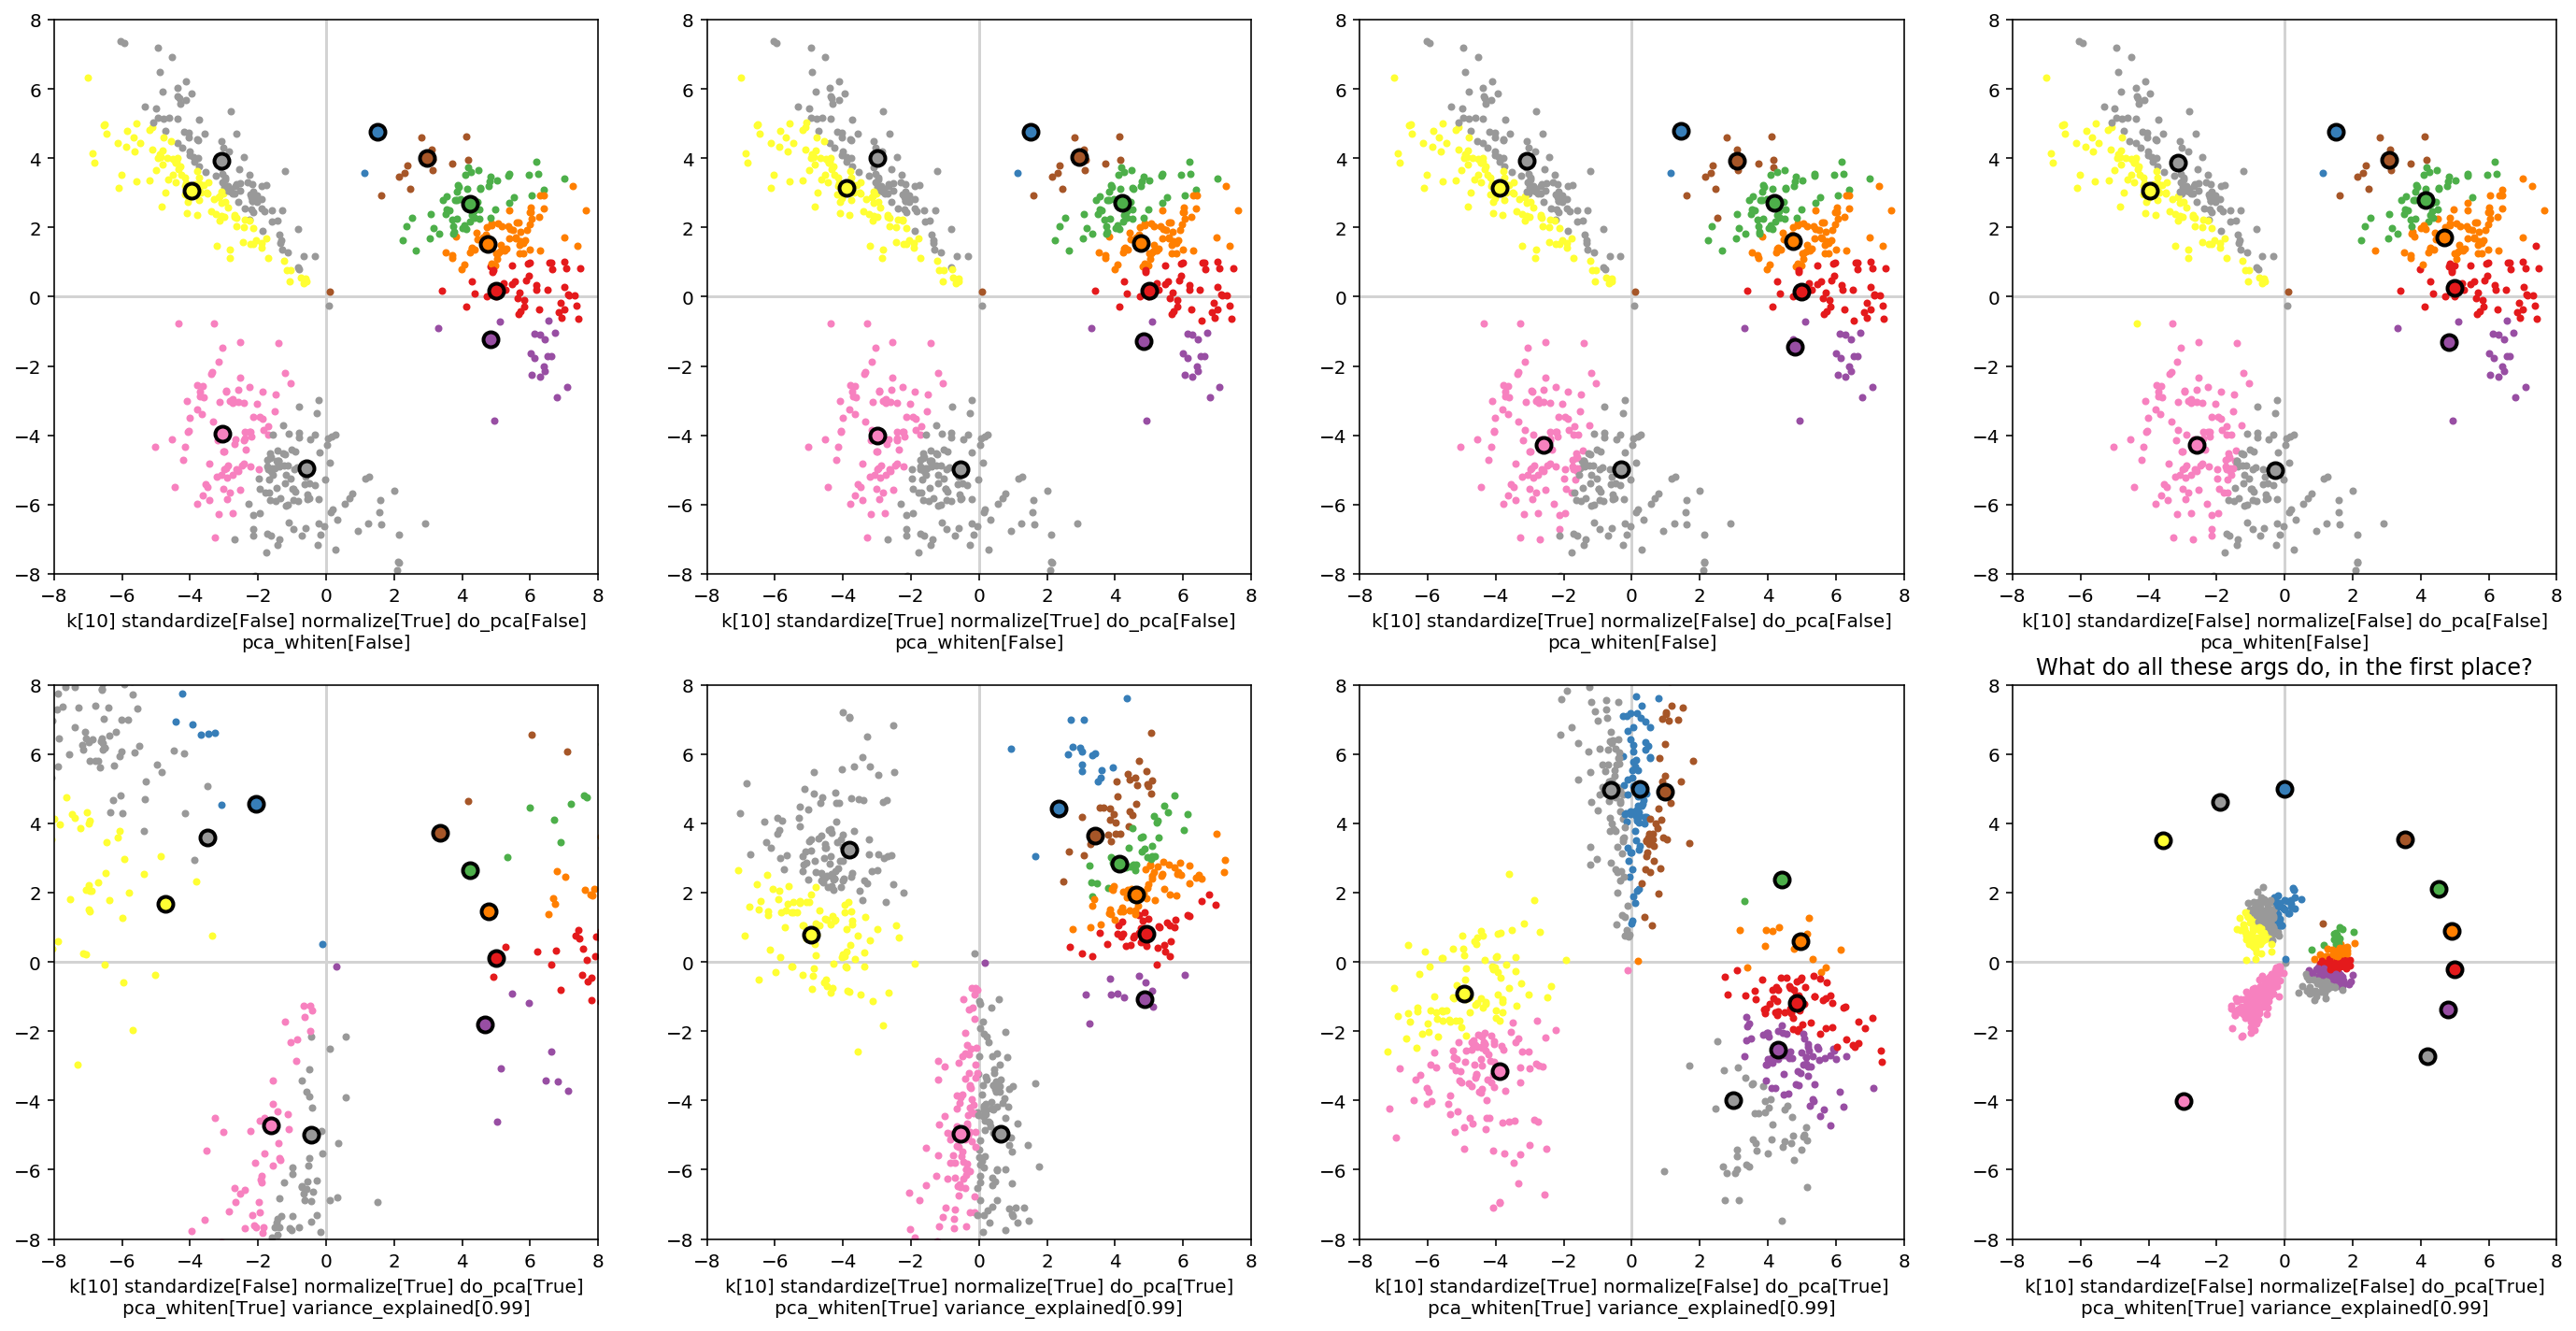

In [ ]:
with with_figsize(width=24, aspect_ratio=1/2):
    for i, skm_config in enumerate([
        dict(k=10, standardize=False, normalize=True,  do_pca=False, pca_whiten=False),
        dict(k=10, standardize=True,  normalize=True,  do_pca=False, pca_whiten=False),
        dict(k=10, standardize=True,  normalize=False, do_pca=False, pca_whiten=False),
        dict(k=10, standardize=False, normalize=False, do_pca=False, pca_whiten=False),
        dict(k=10, standardize=False, normalize=True,  do_pca=True,  pca_whiten=True, variance_explained=.99),
        dict(k=10, standardize=True,  normalize=True,  do_pca=True,  pca_whiten=True, variance_explained=.99),
        dict(k=10, standardize=True,  normalize=False, do_pca=True,  pca_whiten=True, variance_explained=.99),
        dict(k=10, standardize=False, normalize=False, do_pca=True,  pca_whiten=True, variance_explained=.99),
    ]):
        plt.subplot(2, 4, i + 1)
        plot_skm_fit(X_train, D_scale=5, lim=8, **skm_config)
    plt.title('What do all these args do, in the first place?')
    plt.show()

In [ ]:
# Q: Is SKM sensitive to multiplicity, or just spread?

In [ ]:
# Create X_train_mult with some of the mass from X_train repeated many times
#   - TODO Why does shifting the l2 mean of the dataset shift the origin of the spherical centroids...?
mult_n = X_train.shape[1] * 10
X_train_mult = np.array(
    (mult_n // 2) * [X_train[:, 0], -X_train[:, 0]] +
    list(X_train.T)
).T
display(
    X_train.shape,
    X_train[:10, :26],
    X_train_mult.shape,
    X_train_mult[:10, :26],
)

(2, 600)

array([[ 4.239,  4.534,  3.119,  7.121,  4.735,  6.231,  6.998,  4.985,  4.127,  7.139,  5.679,  4.362,  5.562,
         5.385,  3.332,  4.936,  7.009,  4.089,  6.724,  5.674,  7.002,  4.503,  3.307,  7.012,  5.902,  6.394],
       [ 1.27 ,  3.114,  3.667,  0.08 , -1.234,  3.543,  1.714,  0.904, -0.285,  0.036,  1.494,  0.082,  0.441,
         1.694,  1.83 , -3.573, -0.352,  3.52 , -1.048,  1.246,  3.403,  2.244, -0.909,  1.018,  1.919,  2.561]])

(2, 6600)

array([[ 4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239,
        -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239],
       [ 1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 ,
        -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ]])

(2, 600)

array([[ 4.239,  4.534,  3.119,  7.121,  4.735,  6.231,  6.998,  4.985,  4.127,  7.139,  5.679,  4.362,  5.562,
         5.385,  3.332,  4.936,  7.009,  4.089,  6.724,  5.674,  7.002,  4.503,  3.307,  7.012,  5.902,  6.394],
       [ 1.27 ,  3.114,  3.667,  0.08 , -1.234,  3.543,  1.714,  0.904, -0.285,  0.036,  1.494,  0.082,  0.441,
         1.694,  1.83 , -3.573, -0.352,  3.52 , -1.048,  1.246,  3.403,  2.244, -0.909,  1.018,  1.919,  2.561]])

(2, 600)

array([[ 4.239,  4.534,  3.119,  7.121,  4.735,  6.231,  6.998,  4.985,  4.127,  7.139,  5.679,  4.362,  5.562,
         5.385,  3.332,  4.936,  7.009,  4.089,  6.724,  5.674,  7.002,  4.503,  3.307,  7.012,  5.902,  6.394],
       [ 1.27 ,  3.114,  3.667,  0.08 , -1.234,  3.543,  1.714,  0.904, -0.285,  0.036,  1.494,  0.082,  0.441,
         1.694,  1.83 , -3.573, -0.352,  3.52 , -1.048,  1.246,  3.403,  2.244, -0.909,  1.018,  1.919,  2.561]])

(2, 1200)

array([[ 4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239,
        -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239],
       [ 1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 ,
        -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ]])

(2, 1200)

array([[4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239,
        4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239],
       [1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 ,
        1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 ]])

(2, 1800)

array([[ 4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239,
        -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239],
       [ 1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 ,
        -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ]])

(2, 1800)

array([[4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239,
        4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239],
       [1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 ,
        1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 ]])

(2, 6600)

array([[ 4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239,
        -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239,  4.239, -4.239],
       [ 1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 ,
        -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ,  1.27 , -1.27 ]])

(2, 6600)

array([[4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239,
        4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239, 4.239],
       [1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 ,
        1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 , 1.27 ]])

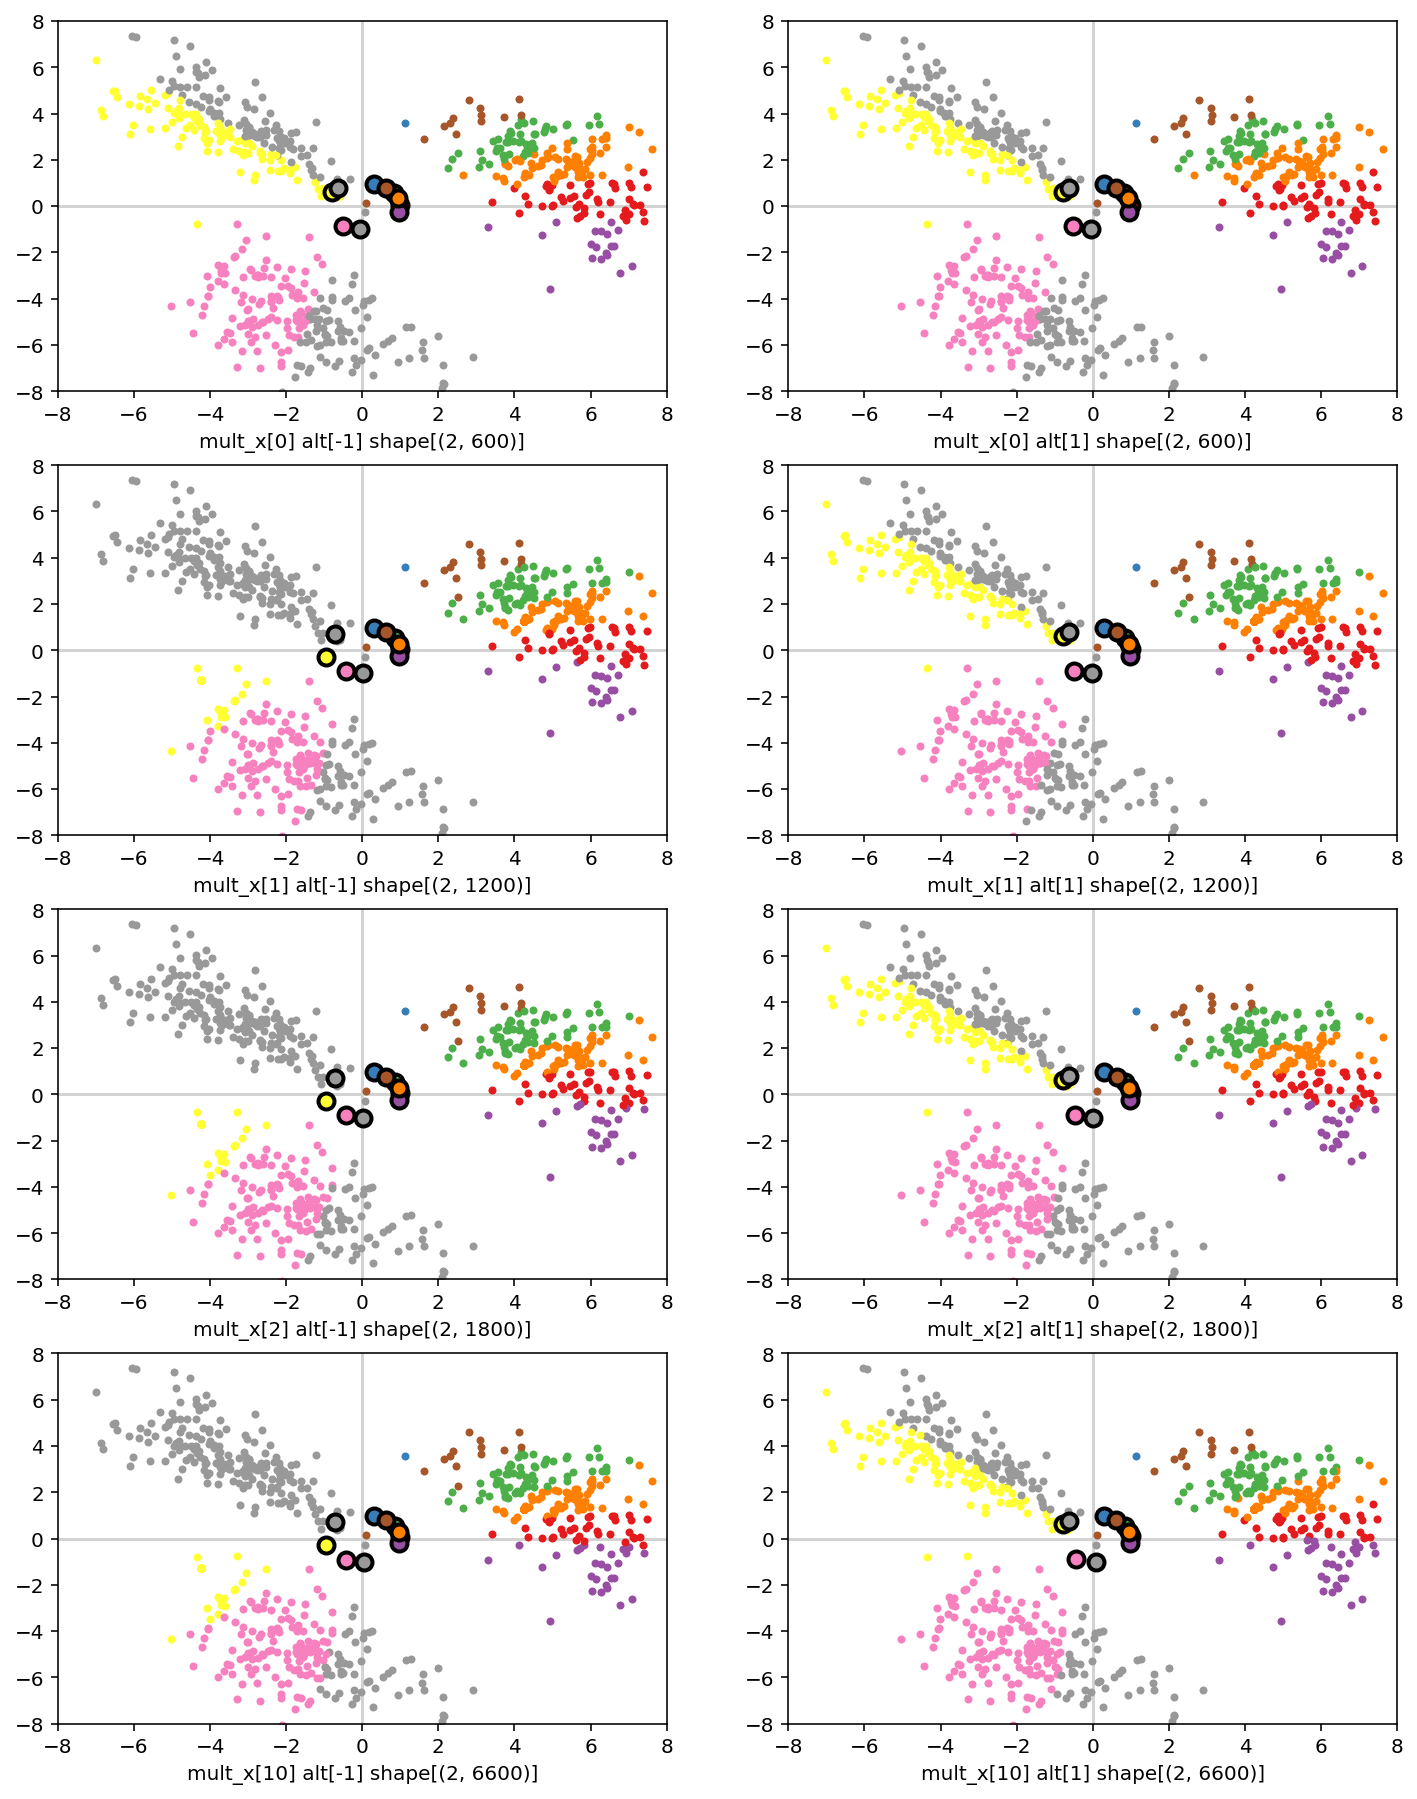

CPU times: user 1min 17s, sys: 1.72 s, total: 1min 19s
Wall time: 1min 15s


In [ ]:
%%time
with with_figsize(width=12, aspect_ratio=8/3):
    plot_skm_fit_kwargs = dict(k=10, lim=8, do_pca=False, pca_whiten=False, standardize=False, normalize=False)
    for i, (X, mult_x, alt) in enumerate([
        (X_train, 0,   -1),
        (X_train, 0,   +1),
        (X_train, 1,   -1),
        (X_train, 1,   +1),
        (X_train, 2,   -1),
        (X_train, 2,   +1),
        (X_train, 10,  -1),
        (X_train, 10,  +1),
        # (X_train, 100, -1),  # Oops, 100x is really slow
        # (X_train, 100, +1),
    ]):
        mult_n = X_train.shape[1] * mult_x
        X_train_mult = np.array(
            (mult_n // 2) * [X_train[:, 0], alt * X_train[:, 0]] +
            list(X_train.T)
        ).T
        display(
            X_train_mult.shape,
            X_train_mult[:10, :26],
        )
        plt.subplot(8, 2, i+1)
        plot_skm_fit(X_train_mult, **plot_skm_fit_kwargs)
        config = dict(mult_x=mult_x, alt=alt, shape=X_train_mult.shape)
        plt.xlabel('\n'.join(textwrap.wrap(width=60, text=' '.join(f'{k}[{v}]' for k, v in config.items()))))
    plt.show()

In [ ]:
# A: not very sensitive to multiplicity/density, but sensitive to spread
#   - High multiplicity/density will swing the centroid of the enclosing cluster(s)
#   - But other clusters (and their centroids) won't be affected
#
# Ref:
#   - https://en.wikipedia.org/wiki/K-means_clustering#Algorithms